In [23]:

main="/mnt/lab_data2/anusri/chrombpnet/"

chrombpnet_uncorrected1=main+"results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/chrombpnet_model/footprints_motifs_uncorrected//motif_footprints.h5"
#tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.08.2022_tobias_corrected_not_softmax_custom_shift/tobias_model/footprints_motifs/motif_footprints.h5"
hint_atac1=main+"results/hint_atac/DNASE_SE/GM12878/DNASE_SE_11.28.2022_hint_atac/hint_atac_model/all_motifs_footprints/motif_footprints.h5"
simple_bias1=main+"results/chrombpnet/DNASE_SE/GM12878/DNASE_SE_03.06.2022_simplebias/chrombpnet_model/footprints_motifs_corrected//motif_footprints.h5"
chrombpnet_corrected1=main+"results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/chrombpnet_model/footprints_motifs/motif_footprints.h5"
bias_model=main+"results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/bias_model/footprints_motifs/motif_footprints.h5"




In [24]:
#uncorrected.keys()

In [25]:
import numpy as np
def normalize_marginal_footprints(input_f):
    for key in input_f:
        if key=="control":
            continue
        #input_f[key][0] = input_f[key][0] * (np.log(input_f[key][1]/input_f["control"][1]))
        #input_f[key][0] = input_f[key][0]

        print(input_f[key][1], input_f["control"][1])
    return input_f

In [26]:
import deepdish

In [27]:
uncorrected = normalize_marginal_footprints(deepdish.io.load(chrombpnet_uncorrected1))
bias = normalize_marginal_footprints(deepdish.io.load(bias_model))
hint_atac = normalize_marginal_footprints(deepdish.io.load(hint_atac1))
chrombpnet = normalize_marginal_footprints(deepdish.io.load(chrombpnet_corrected1))
simple_bias = normalize_marginal_footprints(deepdish.io.load(simple_bias1))



[83.2607] [84.00866]
[84.42042] [84.00866]
[83.19727] [84.00866]
[153.85437] [84.00866]
[160.59735] [84.00866]
[107.533485] [84.00866]
[148.8558] [84.00866]
[119.49995] [84.00866]
[376.5531] [84.00866]
[172.6108] [84.00866]
[141.71698] [84.00866]
[259.7737] [84.00866]
[156.52971] [84.00866]
[316.09836] [84.00866]
[110.97322] [84.00866]
[157.12839] [84.00866]
[106.07511] [84.00866]
[164.04019] [84.00866]
[113.05137] [84.00866]
[84.301476] [84.00866]
[16.572899] [16.552536]
[16.57945] [16.552536]
[16.556501] [16.552536]
[16.531515] [16.552536]
[16.551538] [16.552536]
[16.522635] [16.552536]
[16.549673] [16.552536]
[16.572203] [16.552536]
[16.577026] [16.552536]
[16.54877] [16.552536]
[16.564001] [16.552536]
[16.569633] [16.552536]
[16.57429] [16.552536]
[16.56984] [16.552536]
[16.549437] [16.552536]
[16.531706] [16.552536]
[16.517187] [16.552536]
[16.551163] [16.552536]
[16.538128] [16.552536]
[16.569418] [16.552536]
[102.14852] [104.02118]
[104.47826] [104.02118]
[102.91866] [104.02118]

In [28]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

In [29]:
import numpy as np
def make_inset(input_array, main_axes, color):
    x1 = 0
    x2 = 30

    input_array = input_array*10000

    # select y-range for zoomed region
    y1 = np.ceil(min(input_array))
    y2 = np.ceil(max(input_array))
    

    # Make the zoom-in plot:
    #  axins = zoomed_inset_axes(axs[i-1,3], 2, loc=1) # zoom = 2
    axins = inset_axes(main_axes, loc=1, width="50%", height=0.6) # zoom = 2

    axins.plot(input_array, c=color, alpha=0.8)
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    #axins.set_xticks([80, 120])

    axins.tick_params(axis='both', which='minor', labelsize=8)

    plt.locator_params(axis='y', nbins=2)
    axins.set_yticks([y1, y2])

    plt.xticks(visible=False)
    plt.yticks(visible=True)

    #(main_axes, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=0.1, linestyle="--")
    plt.draw()
    
    

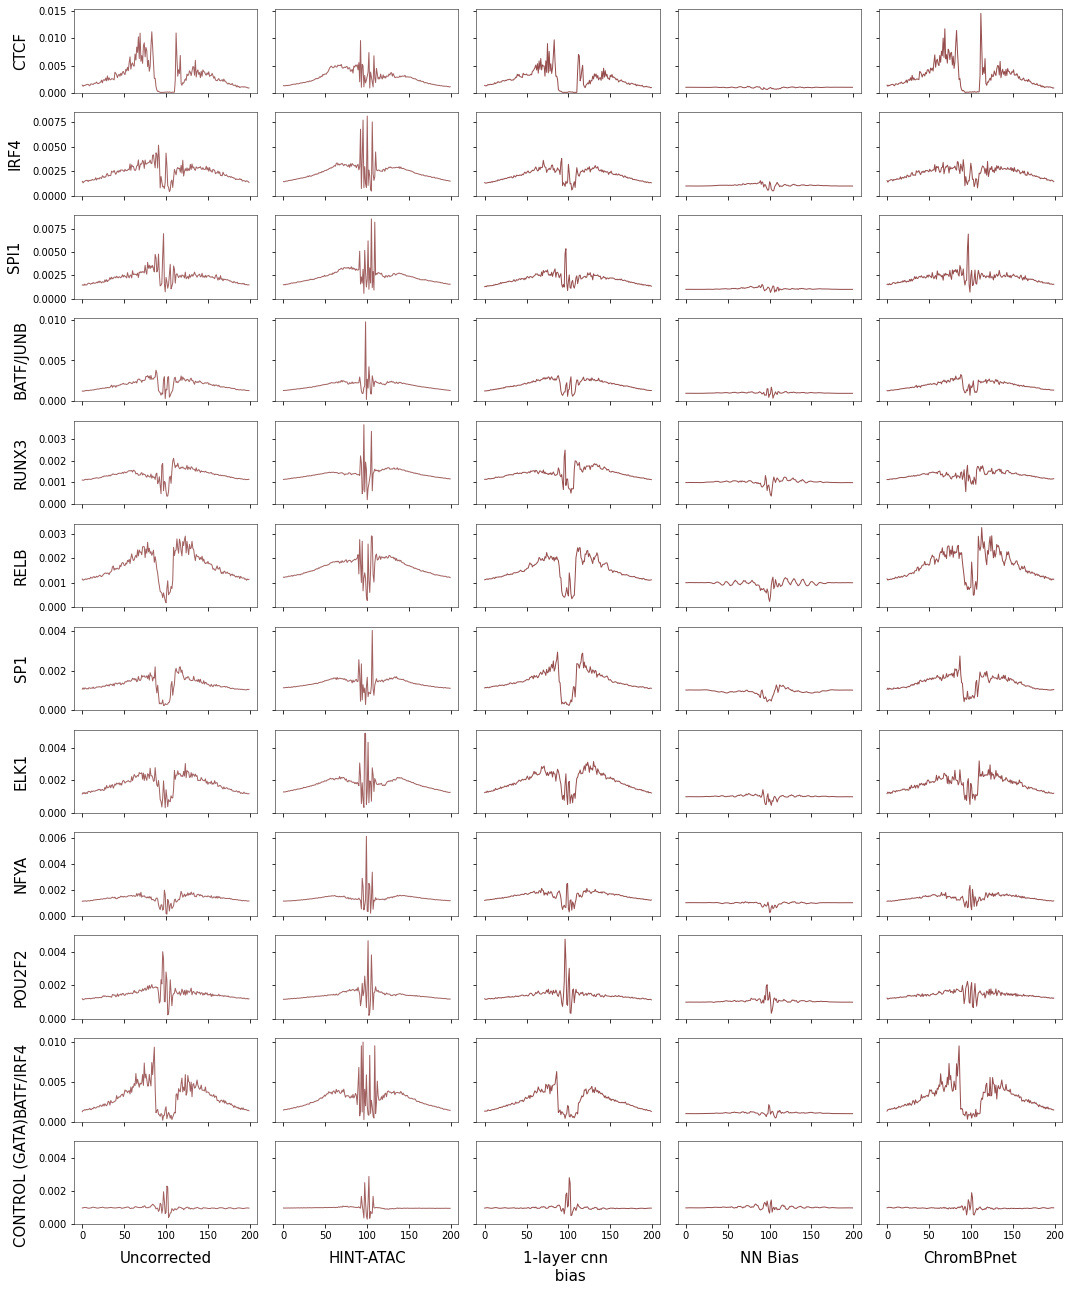

In [34]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
import matplotlib

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
matplotlib.rc('axes', linewidth=0.5) 

fig,axs = plt.subplots(12,5,figsize=(15,18),sharey='row',sharex='col')
#motifs=["AP1", "ETS", "NFKB", "RUNX", "NRF1", "SPI1", "GATA+TAL"]
motifs=[]
for i in range(0,14):
    if i in [4,9,11]:
        continue
    if i==1:
        i=4
    motifs.append("GM12878_SIGNAL_metacluster_0_pattern_"+str(i))
    
motifs.append("K562_COUNTS_metacluster_0_pattern_0")

models = ["Uncorrected", "HINT-ATAC", "1-layer cnn \n bias", "NN Bias" , "ChromBPnet"]
ylims=[0.009,0.009, 0.009, 0.009, 0.009, 0.009, 0.009]
for i in range(1,13):
    #print(motifs[i-1])
    axs[i-1,0].plot(uncorrected[motifs[i-1]][0][400:600], alpha=0.8, label="uncorrected", c="#8B3A3A",linewidth=1)
    axs[i-1,1].plot(hint_atac[motifs[i-1]][0][400:600], alpha=0.8, label="hint-atac", c="#8B3A3A",linewidth=1)
    axs[i-1,2].plot(simple_bias[motifs[i-1]][0][400:600], alpha=0.9, label="chrombpnet", c="#8B3A3A",linewidth=1)
    axs[i-1,3].plot(bias[motifs[i-1]][0][400:600], alpha=0.9, label="chrombpnet", c="#8B3A3A",linewidth=1)
    axs[i-1,4].plot(chrombpnet[motifs[i-1]][0][400:600], alpha=0.9, label="chrombpnet", c="#8B3A3A",linewidth=1)

    if i==12:
        axs[i-1,0].set_ylim([0, 0.005])
        axs[i-1,1].set_ylim([0, 0.005])
        axs[i-1,2].set_ylim([0, 0.005])
        axs[i-1,3].set_ylim([0, 0.005])
        axs[i-1,4].set_ylim([0, 0.005])
    else:
        axs[i-1,0].set_ylim([0, None])
        axs[i-1,1].set_ylim([0, None])
        axs[i-1,2].set_ylim([0, None])
        axs[i-1,3].set_ylim([0, None])
        axs[i-1,4].set_ylim([0, None])      
    
    #print(np.max(tobias[motifs[i-1]][0][450:550]))
    #axs[i-1,0].set_ylim([0, ylims[i-1]])
    #axs[i-1,1].set_ylim([0, ylims[i-1]])
    #axs[i-1,2].set_ylim([0, ylims[i-1]])
    #axs[i-1,3].set_ylim([0, ylims[i-1]])
    #axs[i-1,4].set_ylim([0, ylims[i-1]])
    
    #make_inset(uncorrected[motifs[i-1]][0][400:600],axs[i-1,0], color="#63B8FF")
    #make_inset(hint_atac[motifs[i-1]][0][400:600],axs[i-1,1], color="#4F94CD")
    #if i!=1:
    #if True:
    #    make_inset(uncorrected[motifs[i-1]][0][485:515],axs[i-1,0], color="#36648B")
    #    make_inset(hint_atac[motifs[i-1]][0][485:515],axs[i-1,1], color="#36648B")
    #    make_inset(chrombpnet[motifs[i-1]][0][485:515],axs[i-1,4], color="#36648B")
    #    make_inset(simple_bias[motifs[i-1]][0][485:515],axs[i-1,3], color="#36648B")
    #    make_inset(tobias[motifs[i-1]][0][485:515],axs[i-1,2],color="#36648B")

    #axs[3,i-1].xaxis.set_major_locator(plt.MaxNLocator(3))
    
motifs=["CTCF", "IRF4", "SPI1", "BATF/JUNB", "RUNX3", "RELB", "SP1", "ELK1", "NFYA", "POU2F2", "BATF/IRF4", "CONTROL (GATA)"]
for ax, col in zip(axs[:,0], motifs):
    ax.set_ylabel(col, rotation=90, labelpad=10, fontsize=15)

for ax, row in zip(axs[-1], models):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=15)

#plt.tick_params(left = False, right = False , labelleft = False ,
#                labelbottom = True, bottom = True)

plt.yticks(visible=False)
plt.gca().set_ylim(bottom=0)

plt.savefig("marginal_footprints/dnase_motif_plots.pdf", transparent=True, dpi=300)

#plt.savefig("marginal_footprints_on_motifs_zoomed_all_1.pdf", dpi=300)
#plt.savefig("marginal_footprints_on_motifs_zoomed_2.pdf", dpi=300)


fig.tight_layout()